In [1]:
# 5_monthly_job_posting_for_India

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [2]:
df['job_posted_month'] = df['job_posted_date'].dt.month

In [3]:
df[['job_posted_date','job_posted_month']].sort_values(by='job_posted_month',ascending=True)


,job_posted_date,job_posted_month
785625,2023-01-21 06:20:14,1
785627,2023-01-15 06:18:00,1
785628,2023-01-09 06:08:12,1
785630,2023-01-25 06:17:54,1
785631,2023-01-10 06:12:04,1
...,...,...
97,2023-12-04 13:14:01,12
335460,2023-12-03 23:39:04,12
335451,2023-12-12 23:42:59,12
335554,2023-12-19 23:48:26,12


<Axes: xlabel='job_posted_month'>

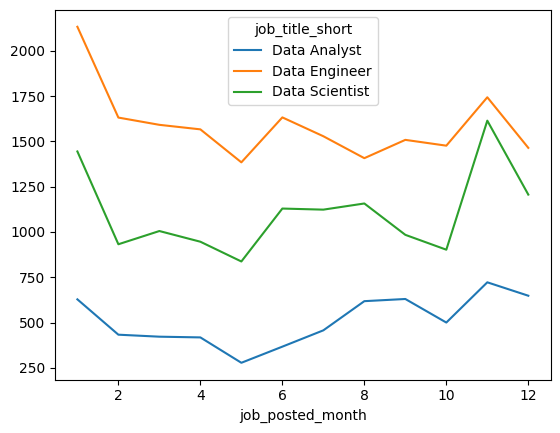

In [8]:
particular_job_titles = ['Data Analyst','Data Engineer','Data Scientist']
Job_in_India = df[df['job_country'] == 'India']
pivot_trend = Job_in_India.pivot_table(index='job_posted_month',columns='job_title_short',values='job_title',aggfunc='count')
pivot_trend = pivot_trend[particular_job_titles]
pivot_trend
# pivot_trend
pivot_trend.plot(kind='line')